In [1]:
pip install unidecode

     |████████████████████████████████| 245kB 8.9MB/s 


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import unidecode
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from collections import Counter
import re
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
dataset = pd.read_csv('/content/drive/My Drive/38891_59255/train_E6oV3lV.csv')

# Data cleaning

In [4]:
dataset.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
dataset.drop('id',axis=1,inplace=True)

In [6]:
dataset.shape

(31962, 2)

### Cleaning for duplicates and null values

In [7]:
dataset.drop_duplicates(inplace=True)

In [8]:
dataset.shape #no duplicates exist

(29530, 2)

In [9]:
dataset['label'].isna().sum() #no null labels

0

In [10]:
dataset['tweet'].isna().sum() #no null tweets

0

### Removing mentions

In [11]:
dataset['clean_tweet'] = dataset['tweet'].apply(lambda x: ' '.join([tweet for tweet in x.split() if not tweet.startswith("@")]))

In [12]:
dataset.head()

,label,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,0,factsguide: society now #motivation,factsguide: society now #motivation


### Removing numbers

In [13]:
dataset['clean_tweet'] = dataset['clean_tweet'].apply(lambda x: ' '.join([tweet for tweet in x.split() if not tweet.isnumeric()]))

### Removing non english symbols


In [14]:
dataset['clean_tweet'] = dataset['clean_tweet'].apply(lambda x: ' '.join([unidecode.unidecode(tweet) for tweet in x.split()]))

### Correcting slang words

In [15]:
slang = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
          'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother', 'cud':'could',
         'fud':'food', 'u':'you', 'ur':'your', 'frm': 'from'}

In [16]:
dataset['clean_tweet'] = dataset['clean_tweet'].apply(lambda x : ' '.join(slang[word] if word in slang else word for word in x.split()))

### Finding hashtags

In [17]:
dataset['Hashtags'] = dataset['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))

In [18]:
dataset.head()

,label,tweet,clean_tweet,Hashtags
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,0,bihday your majesty,bihday your majesty,
3,0,#model i love u take with u all the time in ...,#model i love you take with you all the time i...,#model
4,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [19]:
dataset['Hashtags'][dataset['Hashtags'] == ''] = 'No hashtags'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
dataset.head(50)

,label,tweet,clean_tweet,Hashtags
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,0,bihday your majesty,bihday your majesty,No hashtags
3,0,#model i love u take with u all the time in ...,#model i love you take with you all the time i...,#model
4,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation
5,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...,#allshowandnogo
6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannya|,No hashtags
7,0,the next school year is the year for exams.ð...,the next school year is the year for exams.d- ...,#school #exams #hate #imagine #actorslife #rev...
8,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...,#allin #cavs #champions #cleveland #clevelandc...
9,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !,#gr8


### Removing stopwords

In [21]:
dataset['clean_tweet'] = dataset['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))

### Lemmatization

In [22]:
lemmatizer = WordNetLemmatizer()
dataset['clean_tweet'] = dataset['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

### Stemming

In [23]:
ps = PorterStemmer()
dataset['clean_tweet'] = dataset['clean_tweet'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))

### Collecting hashtags

In [24]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [25]:
hash_non_hate = hashtag_extract(dataset['clean_tweet'][dataset['label'] == 0])
hash_hate = hashtag_extract(dataset['clean_tweet'][dataset['label'] == 1])

In [26]:
hash_non_hate = sum(hash_non_hate,[])
hash_hate = sum(hash_hate,[])

In [33]:
q = Counter(hash_non_hate)
q = dict(q.most_common())
l_non_hate_count = list(q.values())
l_non_hate_values = list(q.keys())

In [34]:
r = Counter(hash_hate)
r = dict(r.most_common())
l_hate_count = list(r.values())
l_hate_values = list(r.keys())

In [35]:
# dataframe for count of most common negative and positive hashtags
l1 = pd.DataFrame(l_non_hate_values,columns = ['Non hate #'])
l2 = pd.DataFrame(l_non_hate_count,columns = ['Non hate # Count'])
l3 = pd.DataFrame(l_hate_values,columns = ['Hate #'])
l4 = pd.DataFrame(l_hate_count,columns = ['Hate # Count'])
hashtags_df = pd.concat([l1,l2,l3,l4],axis = 1)

In [36]:
hashtags_df.head(20)

,Non hate #,Non hate # Count,Hate #,Hate # Count
0,love,1447,trump,120.0
1,smile,611,allahsoil,89.0
2,posit,506,hate,36.0
3,fun,427,bigot,35.0
4,life,393,obama,30.0
5,summer,358,brexit,27.0
6,blog,353,blm,26.0
7,fathersday,317,polit,24.0
8,thank,311,maga,24.0
9,cute,308,black,23.0


# Visualizations

### Wordcloud

In [38]:
hate = ' '.join(dataset[dataset['label'] == 1]['clean_tweet'])
non_hate = ' '.join(dataset[dataset['label'] == 0]['clean_tweet'])
wc = WordCloud(width = 800, height = 500, max_font_size = 110, max_words=100, stopwords=['amp'])

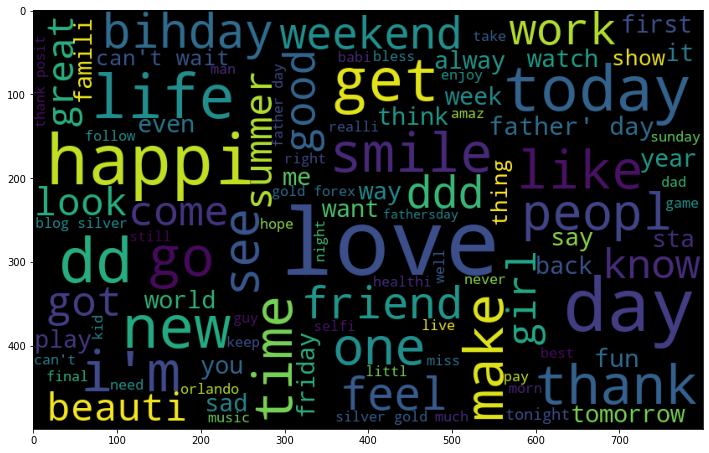

In [39]:
wc.generate(non_hate)
plt.figure(figsize=(12,8))
plt.imshow(wc)

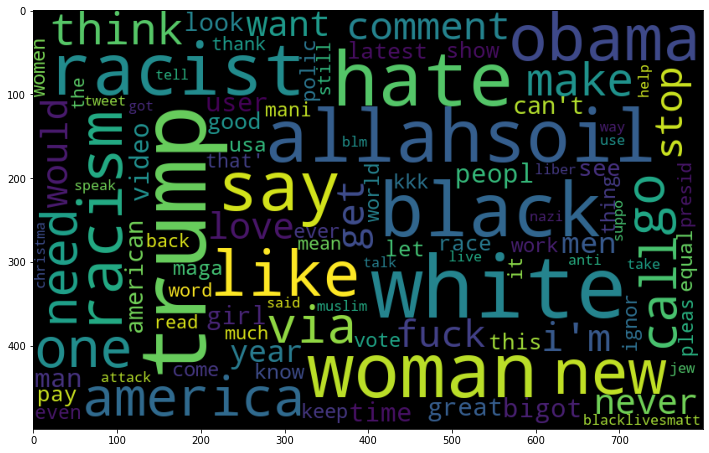

In [40]:
wc.generate(hate)
plt.figure(figsize=(12,8))
plt.imshow(wc)

### Hashtag Frequency

In [45]:
x_values = hashtags_df['Non hate #'][:20]
y_values = hashtags_df['Non hate # Count'][:20]

p = figure(x_range=x_values, plot_height=800,plot_width=1400,title="Non hate #")
p.vbar(x=x_values, top=y_values, width=0.5)

p.xaxis.axis_label = "Hashtags"
p.yaxis.axis_label = "Count"

show(p)

In [46]:
x_values = hashtags_df['Hate #'][:20]
y_values = hashtags_df['Hate # Count'][:20]

p = figure(x_range=x_values, plot_height=800,plot_width=1400,title="Hate #")
p.vbar(x=x_values, top=y_values, width=0.5)

p.xaxis.axis_label = "Hashtags"
p.yaxis.axis_label = "Count"

show(p)